<a href="https://colab.research.google.com/github/skyprince999/100-Days-Of-ML/blob/master/Day_41_Placekey_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Samples copied from the following notebooks: 

https://github.com/Placekey/placekey-py

https://placekey.github.io/placekey-notebooks/basic_functionality.html

https://placekey.github.io/placekey-notebooks/advanced_functionality.html

https://github.com/Placekey/placekey-notebooks/blob/main/notebooks/Adding_Placekey_to_your_POI_dataset_using_python_and_the_Placekey_API.ipynb


Placekey API: ##########################

In [1]:
!pip install placekey

     |████████████████████████████████| 798kB 3.9MB/s 


In [2]:
!git clone https://github.com/Placekey/placekey-notebooks

Cloning into 'placekey-notebooks'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 39 (delta 15), reused 26 (delta 9), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [3]:
import placekey as pk

In [6]:
lat, long = 0.0, 0.0

print(pk.geo_to_placekey(lat, long))

@dvt-smp-tvz


In [7]:
pk.placekey_to_geo('@dvt-smp-tvz')

(0.00018033323813651316, -0.00018985758738881587)

In [8]:
pk.placekey_to_h3('@dvt-smp-tvz')

'8a754e64992ffff'

In [9]:
pk.h3_to_placekey('8a754e64992ffff')

'@dvt-smp-tvz'

In [10]:
pk.placekey_distance('@dvt-smp-tvz', '@5vg-7gq-tjv')

12795124.895573696

In [11]:
 pk.get_prefix_distance_dict()

{0: 20040000.0,
 1: 20040000.0,
 2: 2777000.0,
 3: 1065000.0,
 4: 152400.0,
 5: 21770.0,
 6: 8227.0,
 7: 1176.0,
 8: 444.3,
 9: 63.47}

In [12]:
pk.placekey_format_is_valid('222-227@dvt-smp-tvz')

True

In [13]:
pk.placekey_format_is_valid('@123-456-789')

False

In [4]:
!pip install -r placekey-notebooks/requirements.txt

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 297kB/s 
     |████████████████████████████████| 10.9MB 17.1MB/s 


#######################################################################################################

In [5]:
import placekey as pk
import h3 as h3

In [6]:
geo = (37.779351, -122.418655)  # The front door of SF City Hall

placekey = pk.geo_to_placekey(*geo)
print('The Placekey for the location of SF City Hall is "{}".'.format(placekey))

centroid_lat, centroid_long = pk.placekey_to_geo(placekey)
print('The latitude and longitude for the center of "{}" is ({}, {}).'.format(placekey, centroid_lat, centroid_long))

The Placekey for the location of SF City Hall is "@5vg-7gq-tjv".
The latitude and longitude for the center of "@5vg-7gq-tjv" is (37.77988951810222, -122.41864762076004).


In [7]:
h3_for_placekey = pk.placekey_to_h3(placekey)
print('The H3 index corresponding to "{}" is "{}".'.format(placekey, h3_for_placekey))
print('"{}" has resolution {}.'.format(h3_for_placekey, h3.h3_get_resolution(h3_for_placekey)))

h3_int_for_placekey = pk.placekey_to_h3_int(placekey)
print('The integer H3 index corresponding to "{}" is {}.'.format(placekey, h3_int_for_placekey))

The H3 index corresponding to "@5vg-7gq-tjv" is "8a2830828747fff".
"8a2830828747fff" has resolution 10.
The integer H3 index corresponding to "@5vg-7gq-tjv" is 622203769592250367.


In [8]:
pk.placekey_to_hex_boundary(placekey)

((37.77921928451977, -122.41844077039543),
 (37.77972548542876, -122.41780166521563),
 (37.78039571852498, -122.41800851332172),
 (37.780559746916104, -122.41885447351558),
 (37.78005354361958, -122.41949357434298),
 (37.77938331431949, -122.41928671932915))

In [9]:
pk.placekey_to_wkt(placekey)

'POLYGON ((37.77921928451977 -122.4184407703954, 37.77938331431949 -122.4192867193292, 37.78005354361958 -122.419493574343, 37.7805597469161 -122.4188544735156, 37.78039571852498 -122.4180085133217, 37.77972548542876 -122.4178016652156, 37.77921928451977 -122.4184407703954))'

In [10]:
pk.placekey_to_geojson(placekey)

{'coordinates': (((-122.41844077039543, 37.77921928451977),
   (-122.41780166521563, 37.77972548542876),
   (-122.41800851332172, 37.78039571852498),
   (-122.41885447351558, 37.780559746916104),
   (-122.41949357434298, 37.78005354361958),
   (-122.41928671932915, 37.77938331431949),
   (-122.41844077039543, 37.77921928451977)),),
 'type': 'Polygon'}

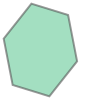

In [11]:
pk.placekey_to_polygon(placekey)

#######################################################################################################

In [12]:
import placekey as pk
import geopandas as gpd
import numpy as np
import folium

In [16]:
cbgs = gpd.read_file('placekey-notebooks/data/CA_2019_census_block_groups_sample/').set_index('GEOID')
cbgs.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
GEOID,,,,,,,,,,,,
060750122012,06,075,012201,2,Block Group 2,G5030,S,30528,0,+37.7849116,-122.4161659,"POLYGON ((-122.41790 37.78517, -122.41626 37.7..."
060750124012,06,075,012401,2,Block Group 2,G5030,S,45978,0,+37.7831562,-122.4149685,"POLYGON ((-122.41607 37.78445, -122.41478 37.7..."
060750124023,06,075,012402,3,Block Group 3,G5030,S,62826,0,+37.7830940,-122.4192115,"POLYGON ((-122.42107 37.78382, -122.42093 37.7..."
060750126021,06,075,012602,1,Block Group 1,G5030,S,248192,544217,+37.8064743,-122.4356584,"POLYGON ((-122.44308 37.80973, -122.43008 37.8..."
060750129011,06,075,012901,1,Block Group 1,G5030,S,90524,0,+37.8010280,-122.4270595,"POLYGON ((-122.42967 37.80165, -122.42802 37.8..."


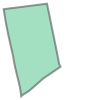

In [17]:
cbg_geometry = cbgs.loc['060750124022']['geometry']
cbg_geometry

In [18]:
cbg_centroid = next(zip(*cbg_geometry.centroid.xy))  # This is a (long, lat) tuple
cbg_map = folium.Map(cbg_centroid[::-1], zoom_start=16, tiles='cartodbpositron')
folium.GeoJson(cbg_geometry).add_to(cbg_map)
cbg_map

In [20]:
covering_placekeys = pk.polygon_to_placekeys(cbg_geometry, geo_json=True)
covering_placekeys

{'boundary': ('@5vg-7gq-t7q',
  '@5vg-7gq-7wk',
  '@5vg-7gq-7kf',
  '@5vg-7gq-r8v',
  '@5vg-7gq-tn5',
  '@5vg-7gq-qpv',
  '@5vg-7gq-ty9',
  '@5vg-7gq-t9z',
  '@5vg-7gq-syv',
  '@5vg-7gq-7yv',
  '@5vg-7gq-rff',
  '@5vg-7gq-tqf',
  '@5vg-7gq-dn5',
  '@5vg-7gq-d9z',
  '@5vg-7gq-gx5',
  '@5vg-7gq-7nq',
  '@5vg-7gq-7qz'),
 'interior': ('@5vg-7gq-tvz',
  '@5vg-7gq-tjv',
  '@5vg-7gq-v2k',
  '@5vg-7gq-tsq',
  '@5vg-7gq-7t9')}

In [21]:
def draw_placekeys(placekey_values, zoom_start=18, folium_map=None, hex_color='lightblue', weight=2, labels=False):
    """
    :param placekey_values: A list of Placekey strings
    :param zoom_start: Folium zoom level. 18 is suitable for neighboring resolution 10 H3s.
    :folium_map: A Folium map object to add the Placekeys to
    :labels: Whether or not to add labels for Placekeys
    :return: a Folium map object
    
    """
    geos = [pk.placekey_to_geo(p) for p in placekey_values]
    hexagons = [pk.placekey_to_hex_boundary(p) for p in placekey_values]

    if folium_map is None:
        centroid = np.mean(geos, axis=0)
        folium_map = folium.Map((centroid[0], centroid[1]), zoom_start=zoom_start, tiles='cartodbpositron')

    for h in hexagons:
        folium.Polygon(
            locations=h,
            weight=weight,
            color=hex_color
        ).add_to(folium_map)
        
    if labels:
        for p, g in zip(placekey_values, geos):
            icon = folium.features.DivIcon(
                icon_size=(120, 36),
                icon_anchor=(60, 15),
                html='<div style="align: center; font-size: 12pt; background-color: lightblue; border-radius: 5px; padding: 2px">{}</div>'.format(p),
            )
            
            folium.map.Marker(
                [g[0], g[1]],
                icon=icon
            ).add_to(folium_map)
        
    return folium_map

In [22]:
pk_cbg_map = draw_placekeys(covering_placekeys['boundary'], folium_map=cbg_map, hex_color='orange')
pk_cbg_map = draw_placekeys(covering_placekeys['interior'], folium_map=pk_cbg_map, hex_color='red')

pk_cbg_map

In [23]:
draw_placekeys(
    covering_placekeys['interior'] + covering_placekeys['boundary'],
    zoom_start=17, labels=True
)

In [24]:
pk.placekey_distance('@5vg-7gq-dn5', '@5vg-7gq-t9z')

473.5610104598311

In [25]:
pk.get_prefix_distance_dict()

{0: 20040000.0,
 1: 20040000.0,
 2: 2777000.0,
 3: 1065000.0,
 4: 152400.0,
 5: 21770.0,
 6: 8227.0,
 7: 1176.0,
 8: 444.3,
 9: 63.47}

In [26]:
pk.placekey_to_hex_boundary('@5vg-7gq-tjv')

((37.77921928451977, -122.41844077039543),
 (37.77972548542876, -122.41780166521563),
 (37.78039571852498, -122.41800851332172),
 (37.780559746916104, -122.41885447351558),
 (37.78005354361958, -122.41949357434298),
 (37.77938331431949, -122.41928671932915))

In [27]:
pk.placekey_to_hex_boundary('@5vg-7gq-tjv', geo_json=True)

((-122.41844077039543, 37.77921928451977),
 (-122.41780166521563, 37.77972548542876),
 (-122.41800851332172, 37.78039571852498),
 (-122.41885447351558, 37.780559746916104),
 (-122.41949357434298, 37.78005354361958),
 (-122.41928671932915, 37.77938331431949),
 (-122.41844077039543, 37.77921928451977))

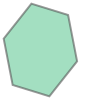

In [28]:
pk.placekey_to_polygon('@5vg-7gq-tjv')

In [29]:
pk.placekey_to_wkt('@5vg-7gq-tjv')

'POLYGON ((37.77921928451977 -122.4184407703954, 37.77938331431949 -122.4192867193292, 37.78005354361958 -122.419493574343, 37.7805597469161 -122.4188544735156, 37.78039571852498 -122.4180085133217, 37.77972548542876 -122.4178016652156, 37.77921928451977 -122.4184407703954))'

In [30]:
pk.placekey_to_geojson('@5vg-7gq-tjv')

{'coordinates': (((-122.41844077039543, 37.77921928451977),
   (-122.41780166521563, 37.77972548542876),
   (-122.41800851332172, 37.78039571852498),
   (-122.41885447351558, 37.780559746916104),
   (-122.41949357434298, 37.78005354361958),
   (-122.41928671932915, 37.77938331431949),
   (-122.41844077039543, 37.77921928451977)),),
 'type': 'Polygon'}

In [31]:
pk.placekey_format_is_valid("223-227@5vg-7gq-tjv")

True

In [32]:
pk.placekey_format_is_valid("223-227@ima-bad-key")

False

In [36]:
import pandas as pd
dutch_tweets = pd.read_excel("Dutch tweets.xlsx")
dutch_tweets.shape

(1000, 11)

In [37]:
dutch_tweets.columns

Index(['full_text', 'created_at', 'screen_name', 'description', 'location',
       'Industry', 'text Translation', 'Day', 'Weekday', 'Month', 'Year'],
      dtype='object')

In [ ]:
pk.